In [1]:
#Code used to evaluate the Lancaster University wind turbine
#Author: Katie Roberts
#Date: 23/05/2021

In [49]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from datetime import datetime
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.axis import Axis
#load the wind turbine data
wind1=pd.read_csv('wt_ext_2017-09.csv')
wind2=pd.read_csv('wt_ext_2017-07.csv')
wind3=pd.read_csv('wt_ext_2017-08.csv')
wind4=pd.read_csv('wt_ext_2017-10.csv')
wind5=pd.read_csv('wt_ext_2017-11.csv')
wind6=pd.read_csv('wt_ext_2017-12.csv')
wind7=pd.read_csv('wt_ext_2018-01.csv')
wind8=pd.read_csv('wt_ext_2018-02.csv')
wind9=pd.read_csv('wt_ext_2018-12.csv')
wind10=pd.read_csv('wt_ext_2018-03.csv')
wind11=pd.read_csv('wt_ext_2018-04.csv')
wind12=pd.read_csv('wt_ext_2018-05.csv')
wind13=pd.read_csv('wt_ext_2018-06.csv')
wind14=pd.read_csv('wt_ext_2018-07.csv')
wind15=pd.read_csv('wt_ext_2018-08.csv')
wind16=pd.read_csv('wt_ext_2018-09.csv')
wind17=pd.read_csv('wt_ext_2018-10.csv')
wind18=pd.read_csv('wt_ext_2018-11.csv')

wind19=pd.read_csv('wt_ext_2019-01.csv')
wind20=pd.read_csv('wt_ext_2019-02.csv')
wind21=pd.read_csv('wt_ext_2019-03.csv')
wind22=pd.read_csv('wt_ext_2019-04.csv')
wind23=pd.read_csv('wt_ext_2019-05.csv')
wind24=pd.read_csv('wt_ext_2019-06.csv')
wind25=pd.read_csv('wt_ext_2019-07.csv')
wind26=pd.read_csv('wt_ext_2019-08.csv')
wind27=pd.read_csv('wt_ext_2019-09.csv')
wind28=pd.read_csv('wt_ext_2019-10.csv')
wind29=pd.read_csv('wt_ext_2019-11.csv')
wind30=pd.read_csv('wt_ext_2019-12.csv')

wind31=pd.read_csv('wt_ext_2020-01.csv')
wind32=pd.read_csv('wt_ext_2020-02.csv')
wind33=pd.read_csv('wt_ext_2020-03.csv')
wind34=pd.read_csv('wt_ext_2020-04.csv')
wind35=pd.read_csv('wt_ext_2020-05.csv')
wind36=pd.read_csv('wt_ext_2020-06.csv')
wind37=pd.read_csv('wt_ext_2020-07.csv')
wind38=pd.read_csv('wt_ext_2020-08.csv')
wind39=pd.read_csv('wt_ext_2020-09.csv')
wind40=pd.read_csv('wt_ext_2020-10.csv')
wind41=pd.read_csv('wt_ext_2020-11.csv')

C:\Users\katie\anaconda3\envs\my_environment\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\katie\anaconda3\envs\my_environment\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (1,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\katie\anaconda3\envs\my_environment\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (1,4,8,12,16,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\katie\anaconda3\envs\my_environment\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (8,12,16,20) have mixed types.Specify dtype option on impo

In [50]:
#create a single dataframe with all the wind turbine data
wind=wind1.append(wind2)
wind=wind.append(wind3)
wind=wind.append(wind4)
wind=wind.append(wind5)
wind=wind.append(wind6)
wind=wind.append(wind7)
wind=wind.append(wind8)
wind=wind.append(wind9)
wind=wind.append(wind10)
wind=wind.append(wind11)
wind=wind.append(wind12)
wind=wind.append(wind13)
wind=wind.append(wind14)
wind=wind.append(wind15)
wind=wind.append(wind16)
wind=wind.append(wind17)
wind=wind.append(wind18)
wind=wind.append(wind19)
wind=wind.append(wind20)
wind=wind.append(wind21)
wind=wind.append(wind22)
wind=wind.append(wind23)
wind=wind.append(wind24)
wind=wind.append(wind25)
wind=wind.append(wind26)
wind=wind.append(wind27)
wind=wind.append(wind28)
wind=wind.append(wind29)
wind=wind.append(wind30)
wind=wind.append(wind31)
wind=wind.append(wind32)
wind=wind.append(wind33)
wind=wind.append(wind34)
wind=wind.append(wind35)
wind=wind.append(wind36)
wind=wind.append(wind37)
wind=wind.append(wind38)
wind=wind.append(wind39)
wind=wind.append(wind40)
wind=wind.append(wind41)


In [51]:
#create a timestamp column that is a datetime data type
wind["timestamp"]=pd.to_datetime(wind["Date/time"])
#order the data in ascending order of the timestamps
wind=wind.sort_values(by='timestamp')
#round the timestamps to the nearest minute
wind['timestamp']=wind['timestamp'].round('T')

#ensure that there is only one set of values for each timestamp
#the new data set will only have the variables that are of interest 
wind1=wind.groupby(['timestamp'])[['Wind Speed;voltage;Avg','Output Power;voltage;Avg', 'Output Power;voltage;Max', 
                                   'Output Power;voltage;Min','Wind Speed;voltage;Max','Wind Speed;voltage;Min' ]].mean()
wind1=wind1.reset_index()

In [52]:
# create a complete list of dates starting at 2017-07-27 00:00:00 and ending at 2020-11-28 23:57:00 with one minute intervals
rng = pd.date_range('2017-07-27 00:00:00', '2020-11-28 23:57:00', freq='min') 
dates = pd.DataFrame({'Date': rng}) #create a data frame from the above list
dates.Date=pd.to_datetime(dates.Date) #ensure that the date column is datetime data type

In [53]:
#merge the complete set of timestamps created above and the wind turbine data
wind_complete=pd.merge(wind1, dates, left_on='timestamp', right_on='Date', how='outer')

In [54]:
#create a new average power list so that the power can be set to zero at times where data was missing and where 
#the average output power is less than zero
Average_output_power=[]
for i in range (wind_complete.index.min(),wind_complete.index.max()+1): 
    if pd.isnull(wind_complete.loc[i, 'Output Power;voltage;Avg'])==True: #data is missing where the average power is null
                 Average_output_power.append(0.0)
    elif wind_complete['Output Power;voltage;Avg'][i]<0: #negative power values need to be set to zero
        Average_output_power.append(0.0)
    else:
        Average_output_power.append(wind_complete['Output Power;voltage;Avg'][i])#where the data is present and more than 
                                                                                #or equal to zero the same output power is kept
    if i==wind_complete.index.max()+1:
        break

In [55]:
#add the average output power list to the turbine data frame
wind_complete['Average_output_power']=Average_output_power
#create a column of the average power mulitplied by the time in hours 
wind_complete['Energy generated (kWh)']=wind_complete['Average_output_power']*1/60

In [56]:
#determine the correlations between the variables of interest in the wind turbine data
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns
import matplotlib.pyplot as plt
corrmat = wind_complete.corr()
corrmat.style.background_gradient(cmap='coolwarm')


,Wind Speed;voltage;Avg,Output Power;voltage;Avg,Output Power;voltage;Max,Output Power;voltage;Min,Wind Speed;voltage;Max,Wind Speed;voltage;Min,Average_output_power,Energy generated (kWh)
Wind Speed;voltage;Avg,1.000000,0.825590,0.819436,0.814838,0.972754,0.961992,0.825588,0.825588
Output Power;voltage;Avg,0.825590,1.000000,0.985646,0.981065,0.767391,0.845955,1.000000,1.000000
Output Power;voltage;Max,0.819436,0.985646,1.000000,0.945355,0.763945,0.834903,0.985646,0.985646
Output Power;voltage;Min,0.814838,0.981065,0.945355,1.000000,0.754387,0.843909,0.981065,0.981065
Wind Speed;voltage;Max,0.972754,0.767391,0.763945,0.754387,1.000000,0.888689,0.767390,0.767390
Wind Speed;voltage;Min,0.961992,0.845955,0.834903,0.843909,0.888689,1.000000,0.845954,0.845954
Average_output_power,0.825588,1.000000,0.985646,0.981065,0.767390,0.845954,1.000000,1.000000
Energy generated (kWh),0.825588,1.000000,0.985646,0.981065,0.767390,0.845954,1.000000,1.000000


In [57]:
#determine the optimum wind speed that leads to the generation of the most energy
#without averaging
print(wind_complete.loc[wind_complete['Output Power;voltage;Max']==(wind_complete['Output Power;voltage;Max'].max())])

                 timestamp  Wind Speed;voltage;Avg  Output Power;voltage;Avg  \
959597 2019-06-03 14:16:00                  0.3994                   51.2141   

        Output Power;voltage;Max  Output Power;voltage;Min  \
959597                 3066.8661                       0.0   

        Wind Speed;voltage;Max  Wind Speed;voltage;Min                Date  \
959597                 23.9839                 -0.0012 2019-06-03 14:16:00   

        Average_output_power  Energy generated (kWh)  
959597               51.2141                0.853568  


Text(0.5, 1.0, 'Rolling average output power at increasing wind speeds')

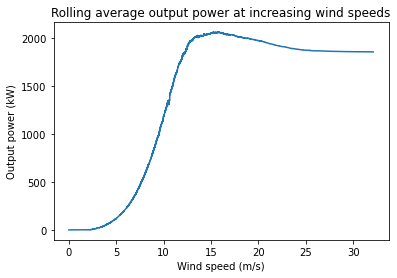

In [58]:
#order the dataframe by wind speed in ascending order
wind_speed_order=wind_complete.sort_values(by='Wind Speed;voltage;Avg')
#calculate the rolling average power output
wind_speed_order[ 'power_rolling_avg' ] = wind_speed_order['Average_output_power'].rolling(10000).mean()
#plot the power against the wind speed
plt.plot(wind_speed_order['Wind Speed;voltage;Avg'], wind_speed_order['power_rolling_avg'])
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Output power (kW)')
plt.title('Rolling average output power at increasing wind speeds')


In [59]:
#find the wind speed that gives the highest average output power
print(wind_speed_order.loc[wind_speed_order['power_rolling_avg']==(wind_speed_order['power_rolling_avg'].max())])
#find the maximum average output power of the smoothed data
max_smoothed_power=wind_speed_order['power_rolling_avg'].max()
print('The maximum average output power of the smoothed data is', max_smoothed_power, 'kW')

                  timestamp  Wind Speed;voltage;Avg  Output Power;voltage;Avg  \
1207794 2019-11-23 04:48:00                  15.751                 2369.4225   

         Output Power;voltage;Max  Output Power;voltage;Min  \
1207794                  2420.423                 2316.1718   

         Wind Speed;voltage;Max  Wind Speed;voltage;Min                Date  \
1207794                 18.1011                 13.5002 2019-11-23 04:48:00   

         Average_output_power  Energy generated (kWh)  power_rolling_avg  
1207794             2369.4225               39.490375        2062.087269  
The maximum average output power of the smoothed data is 2062.0872689599996 kW


In [60]:
#calculate the total duration of the turbine data set from start to end
total_time=(pd.to_datetime(wind_complete.Date.max()))-(pd.to_datetime(wind_complete.Date.min()))
#calculate the total number of hours in the turbine data set
total_hours=total_time/np.timedelta64(1, 'h')

In [61]:
#calculate the maximum possible total energy generated by the wind turbine in the total time
maximum_energy=total_hours*wind_complete['Output Power;voltage;Max'].max()
#calculate the potential maximum average total energy generated by the wind turbine in the total time
maximum_avg_energy=total_hours*wind_complete['Output Power;voltage;Avg'].max()
#calculate the potential maximum smoothed average total energy generated by the wind turbine in the total time
maximum_smoothed_avg_energy=total_hours*max_smoothed_power

In [62]:
#calculate the total energy generated by the wind turbine over the the time
print('Total energy generated is', wind_complete['Energy generated (kWh)'].sum(), '(kWh)')
#Calculate the minimum capacity factor of the wind turbine
print('The minimum capacity factor is ', (wind_complete['Energy generated (kWh)'].sum()/maximum_energy)*100, '%')
print ('A more reasonable capactiy factor is ', (wind_complete['Energy generated (kWh)'].sum()/maximum_avg_energy)*100, '%')
print ('Another more reasonable capactiy factor is ', (wind_complete['Energy generated (kWh)'].sum()/maximum_smoothed_avg_energy)*100, '%')


Total energy generated is 12716436.57481083 (kWh)
The minimum capacity factor is  14.14960935175651 %
A more reasonable capactiy factor is  18.278576072098836 %
Another more reasonable capactiy factor is  21.044190467763755 %


In [63]:
#calculate the downtime ratio
threshold=10 #set the minimum power output threshold that counts as operational
powerzero= wind_complete[wind_complete['Average_output_power']<=10]#create a dataframe of all the points
                                                                   #at which the power output is below the threshold
                 
powerzero=powerzero.reset_index(drop=True)
print('The downtime ratio is',(powerzero.index.max()/wind_complete.index.max())*100,'%')#find the downtime ratio 

30.549522049644047 %


In [64]:
#find the number of days a year that the wind turbine is down
print('The average number of days a year that the turbine is down is',365*(powerzero.index.max()/wind_complete.index.max()))

The average number of days a year that the turbine is down is 111.50575548120077


In [65]:
#create a time column
wind_complete['time']=wind_complete['Date'].apply(lambda x:pd.Timestamp(x).strftime('%H-%M-%S'))
#find the average power output and energy generated at each minute
wind_times=wind_complete.groupby(['time'])[['Output Power;voltage;Avg' , 'Energy generated (kWh)']].mean()
wind_times=wind_times.reset_index()



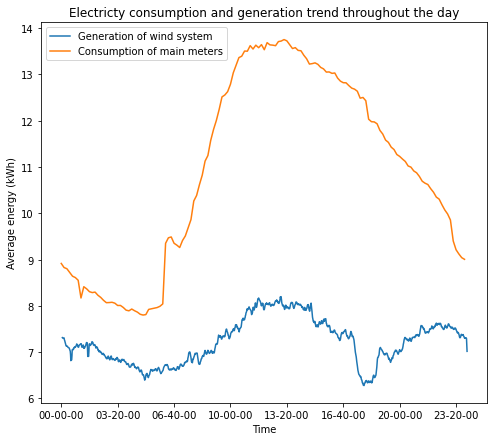

In [66]:
#find the rolling average energy generated
wind_times[ 'energy_rolling_avg' ] = wind_times['Energy generated (kWh)'].rolling(5).mean()
#read the consumption of the main meters data
consumption=pd.read_csv('main_meters_avg.csv')
#create a time column
consumption['time']=consumption['timestamp'].apply(lambda x:pd.Timestamp(x).strftime('%H-%M-%S'))
#group the consumption data by mean readings at each time 
consumption_times=consumption.groupby(['time'])['reading' ].mean()
consumption_times=consumption_times.reset_index()
consumption_times[ 'energy_rolling_avg' ] = consumption_times['reading'].rolling(1).mean()
#plot the energy generated by the wind turbine and the consumption 
from matplotlib.axis import Axis
fig=plt.figure(figsize=(8, 7))
ax = fig.add_subplot()

ax.set_xticks([0,  200,  400, 600, 800, 1000, 1200, 1400])

ax.plot(wind_times.time, (wind_times['energy_rolling_avg']))
ax.plot(consumption_times.time, (consumption_times['energy_rolling_avg']))
plt.xlabel('Time')
plt.ylabel('Average energy (kWh)')
plt.title('Electricty consumption and generation trend throughout the day')
plt.legend([ 'Generation of wind system','Consumption of main meters'],loc='upper left')
plt.show()



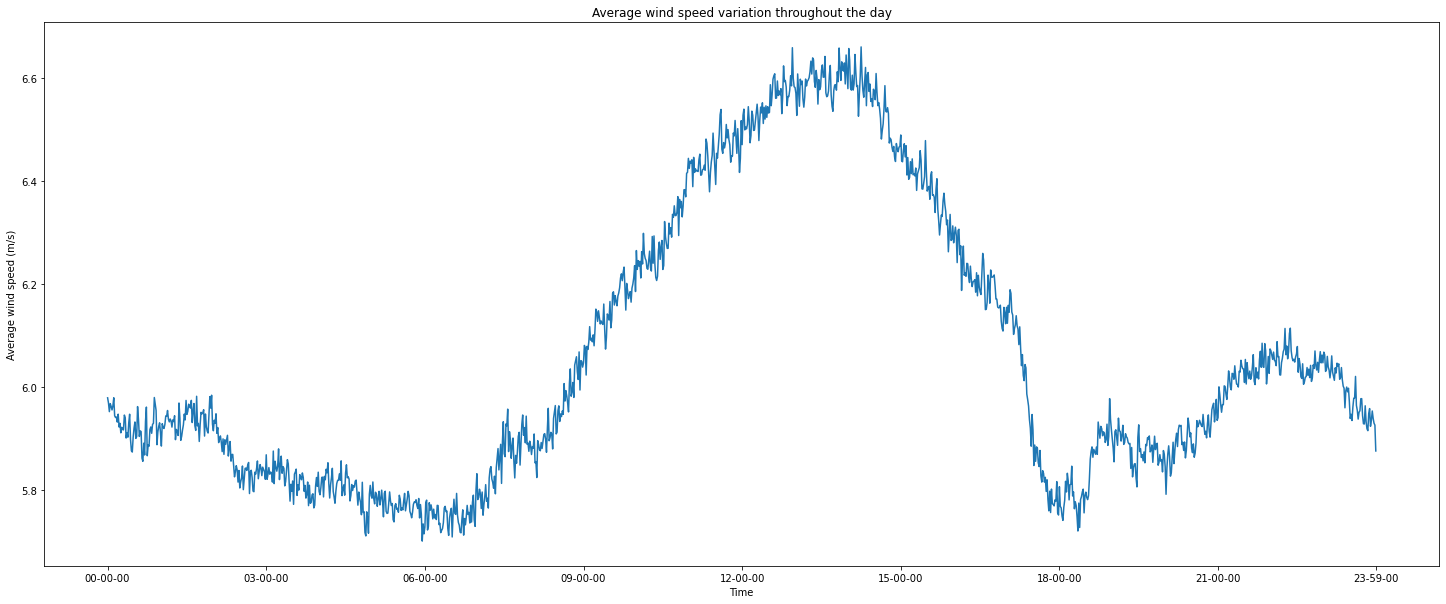

In [67]:
#find the average wind speed at each time and plot the wind speed against time
wind_speed_times=wind_complete.groupby(['time'])[['Wind Speed;voltage;Avg']].mean()
wind_speed_times=wind_speed_times.reset_index()
fig=plt.figure(figsize=(25, 10))
ax = fig.add_subplot()

ax.set_xticks([0,180,360,540,720, 900, 1080,1260,1439])
ax.plot(wind_speed_times.time, wind_speed_times['Wind Speed;voltage;Avg' ])
plt.title('Average wind speed variation throughout the day')
plt.xlabel('Time')
plt.ylabel('Average wind speed (m/s)')
plt.show()

In [68]:
# create a complete list of dates starting at 2017-07-27 00:00:00 and ending at 2020-11-28 23:57:00 with one month intervals
rng2 = pd.date_range('2017-07-01', '2020-12-01', freq='M') 
dates2 = pd.DataFrame({'Date': rng2}) #create a data frame from the above list
dates2.Date=pd.to_datetime(dates2.Date) #ensure that the date column is datetime data type

In [69]:
import datetime
from datetime import datetime
dates2['first_day']=dates2.Date.apply(lambda x:pd.Timestamp(x).strftime('%Y-%m-01'))#create a column of just the date 
                                                                                    #of the first day in the month
prices=[43.05, 43.34, 47.17, 46.68, 51.45, 56.18, 50.84, 53.68, 56.79, 50.74, 54.25, 54, 57.61, 61.94, 67.69, 64.76, 
       62.19, 64.32, 62.55, 50.27, 44.96, 43.87, 41.35, 39.40, 41.86, 39.62, 37.32, 37.74, 46.04, 39.94, 35.93, 
       32.04, 33.22, 24.01, 24.13, 28.42, 31.28, 37.88, 45.3, 44.65, 46.83] #create a list of the wholesale electricty prices
dates2['price']=prices #create a column in the dataframe of the wholesale prices
dates2=dates2[[ 'first_day', 'price']]

In [70]:
#create a firt date of the month column in the turbine dataframe
wind_complete['date']=wind_complete.Date.apply(lambda x:pd.Timestamp(x).strftime('%Y-%m-01'))

In [71]:
#merge the wind turbine data and the wholesale electricity prices dataframe
wind_and_prices=pd.merge(wind_complete, dates2, how='outer', left_on='date', right_on='first_day')

In [72]:
#find the savings at each minute
wind_and_prices['saving']=(wind_and_prices['Energy generated (kWh)']/1000)*wind_and_prices.price

In [73]:
print('The total savings for the dataset available is', wind_and_prices.saving.sum())

The total savings for the dataset available is 589670.5846784216


In [74]:
print('The total time in the available dataset',total_time)

The total time in the available dataset 1220 days 23:57:00


In [75]:
#find the savings made each day
day_saving=wind_and_prices.saving.sum()/1221

In [76]:
#calculate the total number of days to payback the initial turbine cost
wind_turbine_cost=5000000
days=wind_turbine_cost/day_saving

In [77]:
#calculate the total number of years to payback the initial turbine cost
years=days/365
print('The payback time is', years, 'years')
print('The savings made each year is',day_saving*365)
print('The savings made each day is',day_saving)

The payback time is 28.3650360588732 years
The savings made each year is 176273.3525041965
The savings made each day is 482.9406917923191
